<a href="https://colab.research.google.com/github/Lim1029/SIF3012/blob/main/SIF3012_Lorenz_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulation of Chaotic Behaviour of General Circulation using Lorenz Attractor with Runge-Kutta 4th Model

This project aims to perform simulation of the chaotic behaviour of the general atmospheric circulation using Lorenz Attractor, where the Lorenz Attractor will be attained using Runge-Kutta 4th Model. There are 3 concepts required to be understood for the simulation:

1. Runge Kutta 4th-Order Method
2. Lorenz System
3. Lorenz System in General Atmospheric Circulation

#1. Runge-Kutta 4th-Order Method

Runge-Kutta is a numerical method employed to solve first-order ordinary differential equations (ODE) at high accuracy while avoid tedious calculations. Runge-Kutta method coordinates with Taylor Series up to the term in $h_r$ where r varies from method to method provides approximate value of y at a given point x.

For Runge-Kutta 4th-order method (RK4), the general equation is provided as:

$y_{i+1}$ = $y_i$ + $\frac{1}{6}$$(k_1 + 2k_2 + 2k_3 + k_4)$

Where

k1 : $hf(x_i,y_i)$

k2 : $hf(x_i + (\frac{1}{2})h,y_i + (\frac{1}{2})k_1)$

k3 : $hf(x_i + (\frac{1}{2})h,y_i + (\frac{1}{2})k_2)$

k4 : $hf(x_i + h,y_i + k_3)$

#2. Lorenz System

Lorenz system is a system of Ordinary Differential Equations(ODE), which has characteristics of having chaotic solutions with different parameter value and initial conditions.


Lorenz system was first studied and demonstrated Edward Lorenz in 1963 in the process of developing numerical simulations for simplified mathematical model for atmospheric convection.

For a 3D-space, Lorenz system can be differentiated into 3 differential equations to account for each dimensional axis with respect to their time evolution as stated below:

$\frac{dx}{dt} = σ(y-x)$

$\frac{dy}{dt} = x(\rho - z) - y$

$\frac{dz}{dt} = xy - \beta z$

Where $\sigma,  \rho$  and $\phi$ are parameter values for the system, proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself

The code below will showcase the simulation of Lorenz system and showing its chaotic characteristics under different initial conditions and parametric values

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Lorenz system for 3D Catesian Coordinates system
def fx(x,y,z,t,s):
    dxdt=s*(y-x)
    return dxdt

def fy(x,y,z,t,r):
    dydt=x*(r-z)-y
    return dydt

def fz(x,y,z,t,b):
    dzdt=x*y-b*z
    return dzdt

In [ ]:
#To perform of Runge-Kutta Method, we need term k1, k2, k3, k4 for each dimensional axis (x, y, z)
def RungeKutta4(x,y,z,fx,fy,fz,t,h,s,r,b):
    #Working for k1
    k1x = h*fx(x,y,z,t,s)
    k1y = h*fy(x,y,z,t,r)
    k1z = h*fz(x,y,z,t,b)

    #Working for k2
    k2x = h*fx(x+k1x/2,y+k1y/2,z+k1z/2,t+h/2,s)
    k2y = h*fy(x+k1x/2,y+k1y/2,z+k1z/2,t+h/2,r)
    k2z = h*fz(x+k1x/2,y+k1y/2,z+k1z/2,t+h/2,b)
    
    
    #Working for k3
    k3x = h*fx(x+k2x/2,y+k2y/2,z+k2z/2,t+h/2,s)
    k3y = h*fy(x+k2x/2,y+k2y/2,z+k2z/2,t+h/2,r)
    k3z = h*fz(x+k2x/2,y+k2y/2,z+k2z/2,t+h/2,b)

    #Working for k3\4
    k4x = h*fx(x+k3x,y+k3y,z+k3z,t+h,s)
    k4y = h*fy(x+k3x,y+k3y,z+k3z,t+h,r)
    k4z = h*fz(x+k3x,y+k3y,z+k3z,t+h,b)

    #Return in the form of general equation for 3D
    return x+(k1x+2*k2x+2*k3x+k4x)/6, y+(k1y+2*k2y+2*k3y+k4y)/6, z+(k1z+2*k2z+2*k3z+k4z)/6

Here the symbol were explained as below:

$σ$ : sigma

$β$ : beta

$ρ$ : rho

Now we showcase the effect of initial conditions and parametric value towards the evolution of the Lorenz Model

#1. Parametric value

In [ ]:
#For case of varying parametric value
def Cparam(sigma, beta, rho):
  #Defining parametric values
  
  tIn   = 0.        #Initial step value
  tFin  = 70.       #Final step value
  h     = 0.01      #Step increment value
  totalSteps = int(np.floor((tFin-tIn)/h))    #Calculation of total number of steps

  #Generate arrays of complete 0 value
  t  = totalSteps * [0.0]
  x = totalSteps * [0.0]
  y = totalSteps * [0.0]
  z = totalSteps * [0.0]
  s = sigma
  b = beta
  r = rho
  x[0],y[0],z[0],t[0] = 1., 1., 1., 0.  #Defining initial values for Lorenz System

  #Iterations of Runge-Kutta 4th-Order Method to solve for Lorenz Model
  for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], h, s,r,b)

  return x,y,z

Text(0.5, 0, 'z')

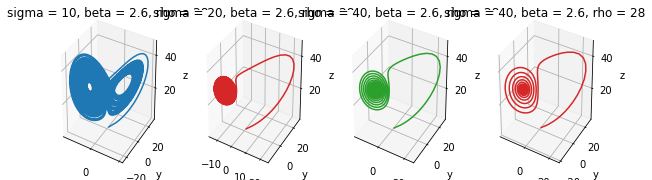

In [ ]:
#For different sigma value
A = Cparam(10., 8./3., 28.)
B = Cparam(20., 8./3., 28.)
C = Cparam(30., 8./3., 28.)
D = Cparam(40., 8./3., 28.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]

fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 2.6, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('sigma = 20, beta = 2.6, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('sigma = 40, beta = 2.6, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('sigma = 40, beta = 2.6, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

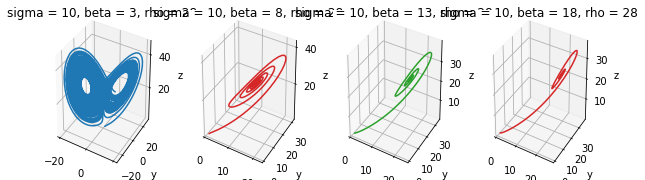

In [ ]:
#For different beta value
A = Cparam(10., 3., 28.)
B = Cparam(10., 8., 28.)
C = Cparam(10., 13., 28.)
D = Cparam(10., 18., 28.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]

fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 3, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 8, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 13, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 18, rho = 28')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

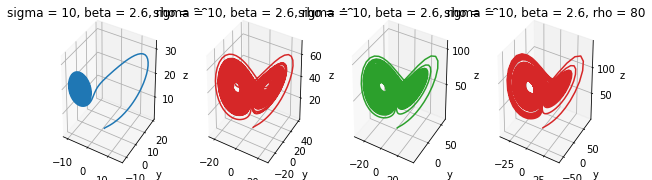

In [ ]:
#For different rho value
A = Cparam(10., 2.6, 20.)
B = Cparam(10., 2.6, 40.)
C = Cparam(10., 2.6, 60.)
D = Cparam(10., 2.6, 80.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]

fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 2.6, rho = 20')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 2.6, rho = 40')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 2.6, rho = 60')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('sigma = 10, beta = 2.6, rho = 80')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#2. Initial Conditions

In [ ]:
#For case of varying parametric value
def Cinitial(inx, iny, inz):
  #Defining parametric values
  s = 10.
  b = 2.6
  r = 28.
  tIn   = 0.        #Initial step value
  tFin  = 70.       #Final step value
  h     = 0.01      #Step increment value
  totalSteps = int(np.floor((tFin-tIn)/h))    #Calculation of total number of steps

  #Generate arrays of complete 0 value
  t  = totalSteps * [0.0]
  x = totalSteps * [0.0]
  y = totalSteps * [0.0]
  z = totalSteps * [0.0]

  x[0],y[0],z[0],t[0] = inx, iny, inz, 0.  #Defining initial values for Lorenz System

  #Iterations of Runge-Kutta 4th-Order Method to solve for Lorenz Model
  for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], h, s,r,b)

  return x,y,z

rho = 


Text(0.5, 0, 'z')

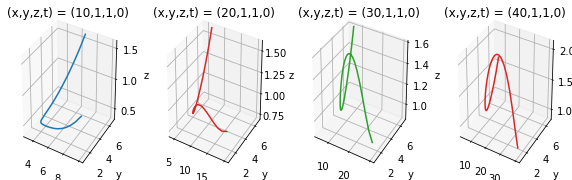

In [ ]:
#For case x is different
A = Cinitial(10., 1., 1.)
B = Cinitial(20., 1., 1.)
C = Cinitial(30., 1., 1.)
D = Cinitial(40., 1., 1.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]


print("sigma, beta, rho = 10, 2.6, 28")
fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (10,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (20,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (30,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (40,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
#For case x is different
A = Cinitial(20., 1., 1.)
B = Cinitial(40., 1., 1.)
C = Cinitial(60., 1., 1.)
D = Cinitial(80., 1., 1.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]


print("rho = 10, 2.6, 28")
fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (20,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (40,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (60,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (80,1,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
#For case y is different
A = Cinitial(1., 20., 1.)
B = Cinitial(1., 40., 1.)
C = Cinitial(1., 60., 1.)
D = Cinitial(1., 80., 1.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]


print("rho = 10, 2.6, 28")
fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,20,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,40,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,60,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,80,1,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

rho = 10, 2.6, 28


Text(0.5, 0, 'z')

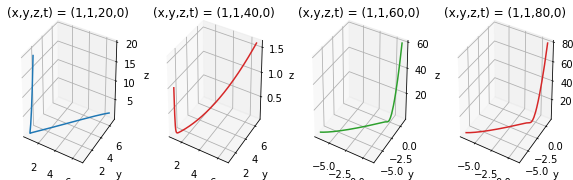

In [ ]:
#For case z is different
A = Cinitial(1., 1., 20.)
B = Cinitial(1., 1., 40.)
C = Cinitial(1., 1., 60.)
D = Cinitial(1., 1., 80.)
x1, y1, z1 = A[0],  A[1],  A[2]
x2, y2, z2 = B[0],  B[1],  B[2]
x3, y3, z3 = C[0],  C[1],  C[2]
x4, y4, z4 = D[0],  D[1],  D[2]


print("rho = 10, 2.6, 28")
fig = plt.figure(figsize = (10,3))


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(x1, y1, z1, label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,1,20,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.plot(x2, y2, z2, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,1,40,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.plot(x3, y3, z3, 'tab:green', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,1,60,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.plot(x4, y4, z4, 'tab:red', label='Lorentz 3D Solution')
ax.set_title('(x,y,z,t) = (1,1,80,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#Notes :

1. The h value can decide on the smoothness of the lines, the larger the value of h, the more "zig-zag" was shown for the graph plotted